In [78]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.dates as mpl_dates
import matplotlib.ticker as ticker

In [79]:
# read the data set
df = pd.read_csv('datasets/national-history.csv', index_col=0)
df.head()

,death,deathIncrease,inIcuCumulative,inIcuCurrently,hospitalizedIncrease,hospitalizedCurrently,hospitalizedCumulative,negative,negativeIncrease,onVentilatorCumulative,onVentilatorCurrently,posNeg,positive,positiveIncrease,recovered,states,totalTestResults,totalTestResultsIncrease
date,,,,,,,,,,,,,,,,,,
2020-09-26,196562.0,866,20002.0,6057.0,1154,29554.0,403325.0,89982483,886140,2272.0,1509.0,0,7045170,47733,2750459.0,56,100492536,1004261
2020-09-25,195696.0,844,19919.0,6133.0,1331,29769.0,402171.0,89096343,856519,2264.0,1506.0,0,6997437,55526,2727335.0,56,99488275,1011675
2020-09-24,194852.0,921,19555.0,6168.0,1588,30043.0,400840.0,88239824,823449,2177.0,1560.0,0,6941911,43772,2710183.0,56,98476600,940353
2020-09-23,193931.0,1157,19452.0,6113.0,1451,29905.0,399252.0,87416375,800878,2154.0,1544.0,0,6898139,38567,2672338.0,56,97536247,923704
2020-09-22,192774.0,854,19324.0,6111.0,1446,29459.0,397801.0,86615497,672641,2130.0,1562.0,0,6859572,49439,2646959.0,56,96612543,769953


In [80]:
# get the necessary columns only
df = df[['death', 'deathIncrease', 'negative', 'negativeIncrease', 'positive', 'positiveIncrease', 'recovered', 'totalTestResults', 'totalTestResultsIncrease']]
df.rename(columns={'deathIncrease': 'new_deaths', 'positiveIncrease': 'new_positve', 'totalTestResultsIncrease': 'new_tests'}, 
         inplace=True)

In [81]:
 # fill missing values with 0
df.fillna(0, inplace=True)

In [82]:
# setting and sorting index
df.index = pd.to_datetime(df.index)
df.sort_index(inplace=True)

In [83]:
df.head()

,death,new_deaths,negative,negativeIncrease,positive,new_positve,recovered,totalTestResults,new_tests
date,,,,,,,,,
2020-01-22,0.0,0,0,0,0,0,0.0,1,0
2020-01-23,0.0,0,0,0,0,0,0.0,2,1
2020-01-24,0.0,0,0,0,0,0,0.0,2,0
2020-01-25,0.0,0,0,0,0,0,0.0,2,0
2020-01-26,0.0,0,0,0,0,0,0.0,2,0


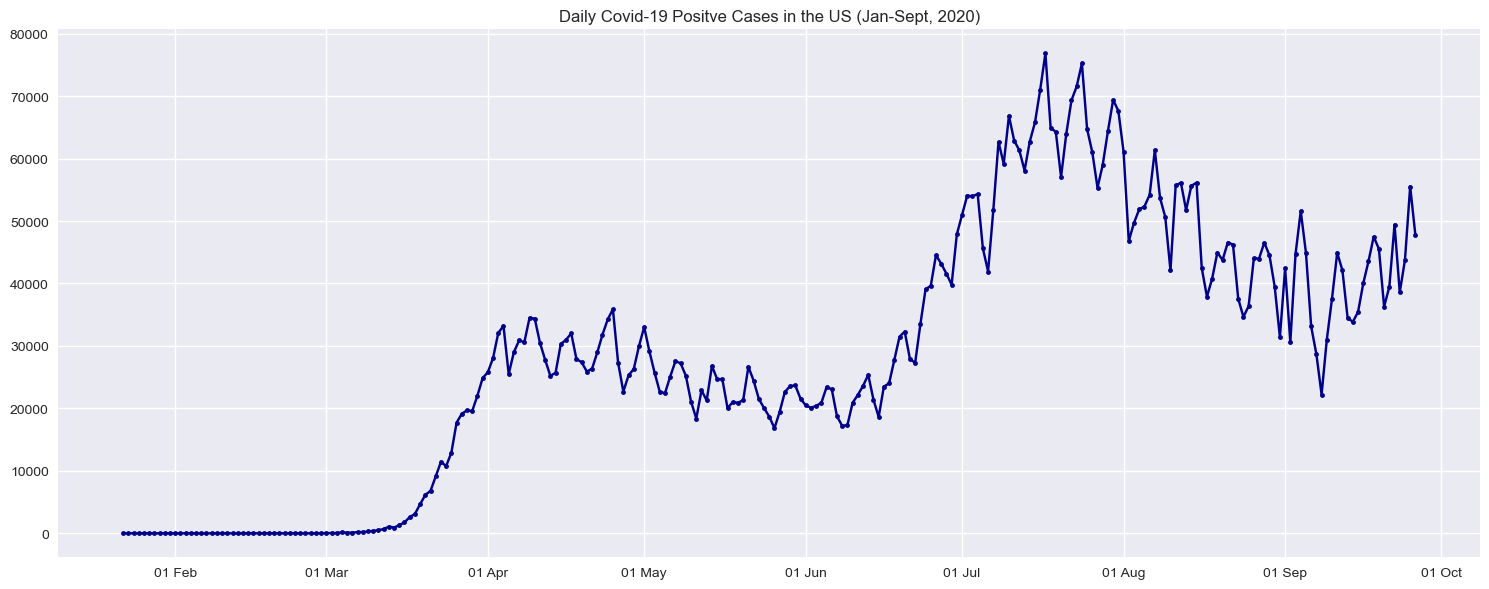

In [84]:
# visualizing Daily Covid-19 Positve Cases
dates = df.index
daily_cases = df['new_positve']

plt.style.use('seaborn')

plt.figure(figsize=(15, 6), dpi=100)
plt.title('Daily Covid-19 Positve Cases in the US (Jan-Sept, 2020)')

date_format = mpl_dates.DateFormatter('%d %b')
plt.gca().xaxis.set_major_formatter(date_format)


plt.plot(dates, daily_cases, color='#00008B', marker='.');
plt.tight_layout()

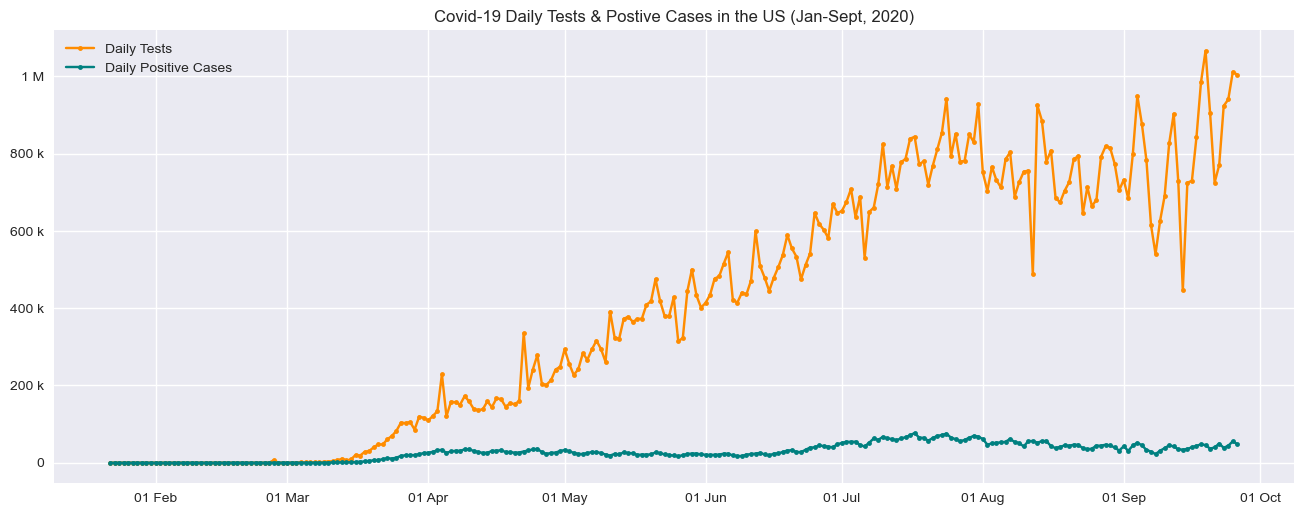

<Figure size 576x396 with 0 Axes>

In [85]:
# visualizing Daily Covid-19 Daily Tests & Positve Cases
daily_tests = df['new_tests']

plt.figure(figsize=(16, 6), dpi=100)
plt.title('Covid-19 Daily Tests & Postive Cases in the US (Jan-Sept, 2020)')

date_format = mpl_dates.DateFormatter('%d %b')
plt.gca().xaxis.set_major_formatter(date_format)
plt.gca().yaxis.set_major_formatter(ticker.EngFormatter())


plt.plot(dates, daily_tests, color='#FF8C00', marker='.', label='Daily Tests');
plt.plot(dates, daily_cases, color='#008080', marker='.', label='Daily Positive Cases');



plt.legend();
plt.show();
plt.tight_layout();

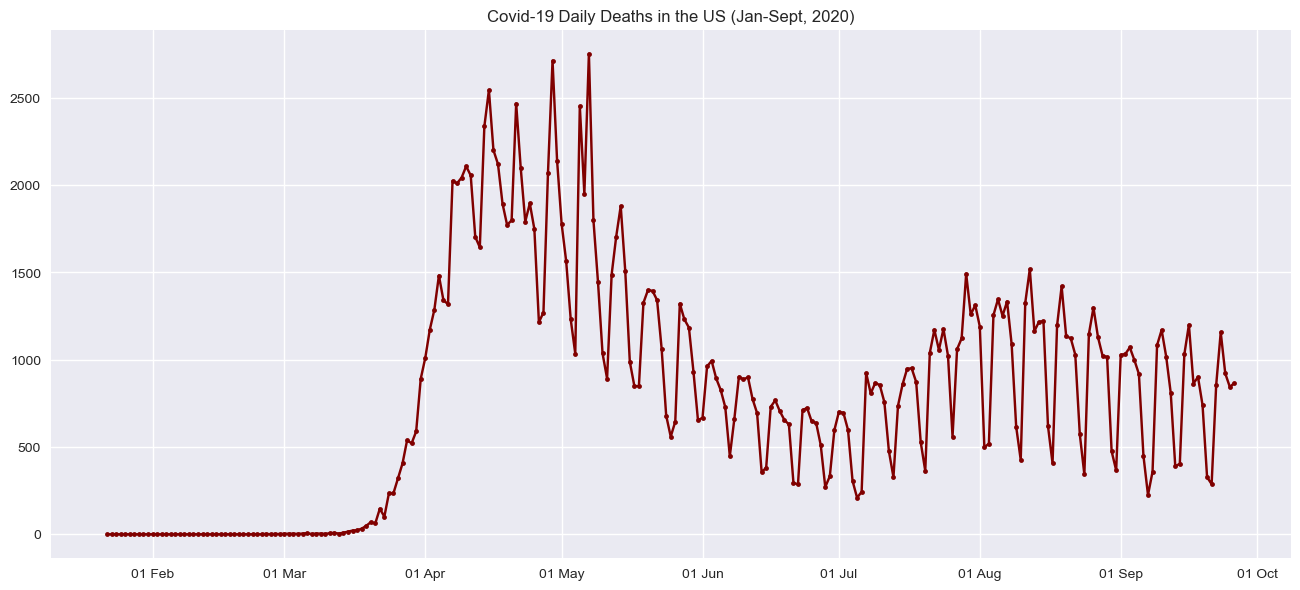

<Figure size 576x396 with 0 Axes>

In [86]:
# visualizing Covid-19 Daily Deaths
daily_deaths = df['new_deaths']

plt.figure(figsize=(16, 7), dpi=100)
plt.title('Covid-19 Daily Deaths in the US (Jan-Sept, 2020)')

date_format = mpl_dates.DateFormatter('%d %b')
plt.gca().xaxis.set_major_formatter(date_format)


plt.plot(dates, daily_deaths, color='#800000', marker='.');


plt.show();
plt.tight_layout();

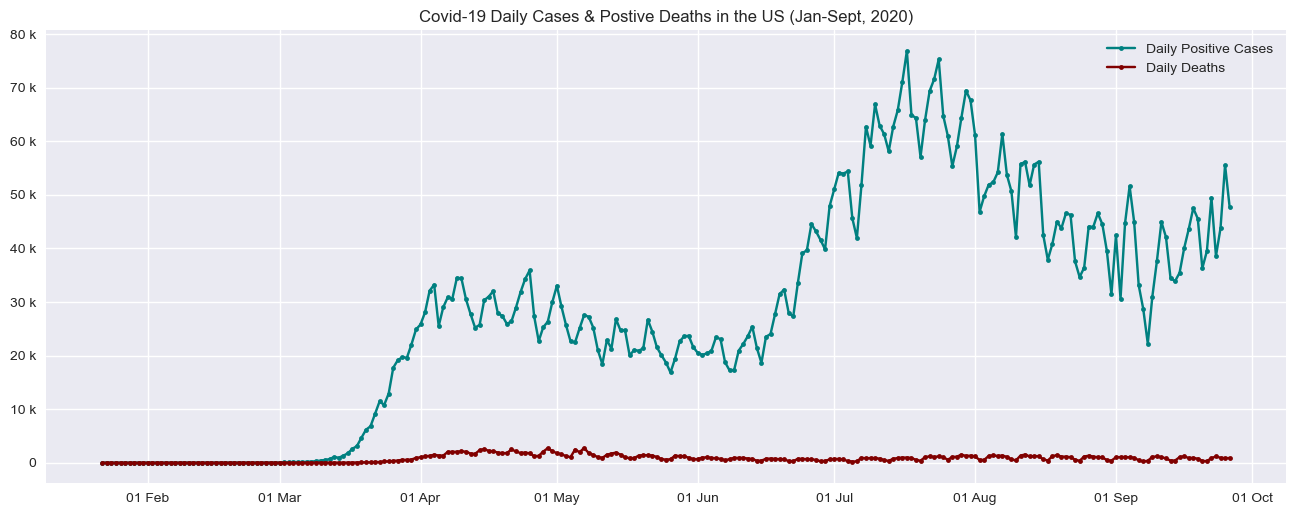

<Figure size 576x396 with 0 Axes>

In [87]:
# visualizing  Daily Cases & Postive Deaths
plt.figure(figsize=(16, 6), dpi=100)
plt.title('Covid-19 Daily Cases & Postive Deaths in the US (Jan-Sept, 2020)')

date_format = mpl_dates.DateFormatter('%d %b')
plt.gca().xaxis.set_major_formatter(date_format)
plt.gca().yaxis.set_major_formatter(ticker.EngFormatter())


plt.plot(dates, daily_cases, color='#008080', marker='.', label='Daily Positive Cases');
plt.plot(dates, daily_deaths, color='#800000', marker='.', label='Daily Deaths');

plt.legend();
plt.show();
plt.tight_layout();

# States

In [88]:
# read from the states dataset
states_df = pd.read_csv('datasets/all-states-history.csv', index_col=0)
states_df.head()

,state,dataQualityGrade,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,...,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
date,,,,,,,,,,,,,,,,,,,,,
2020-09-26,WY,B,50.0,NaN,0,NaN,258.0,258.0,22.0,2,...,97871.0,45,NaN,NaN,NaN,NaN,96991.0,0,155082.0,0
2020-09-26,NE,A,468.0,NaN,6,NaN,2276.0,2276.0,225.0,17,...,440645.0,3341,NaN,NaN,NaN,NaN,440947.0,3344,595287.0,5078
2020-09-26,ND,B,156.0,153.0,0,3.0,809.0,809.0,104.0,20,...,594628.0,7064,9344.0,NaN,NaN,NaN,236229.0,1595,616642.0,7621
2020-09-26,NC,A+,3440.0,3440.0,31,NaN,NaN,NaN,914.0,0,...,2947803.0,40186,NaN,NaN,NaN,NaN,NaN,0,2943144.0,40090
2020-09-26,MT,C,171.0,NaN,1,NaN,684.0,684.0,147.0,9,...,329285.0,3169,NaN,NaN,NaN,NaN,NaN,0,329285.0,3169


In [89]:
#getting necessary columns
states_df = states_df[['state', 'death', 'deathIncrease', 'positive', 'positiveIncrease', 'totalTestResults',
       'totalTestResultsIncrease' ]]

In [90]:
states_df.sort_index(inplace=True)
states_df.index = pd.to_datetime(states_df.index)
states_df.fillna(0, inplace=True)

In [91]:
# grouping data by states
states_grp = states_df.groupby('state')
total_case_counts = states_grp['positiveIncrease'].sum()
sorted_states = total_case_counts.sort_values(ascending=False)
sorted_states = sorted_states.to_dict()

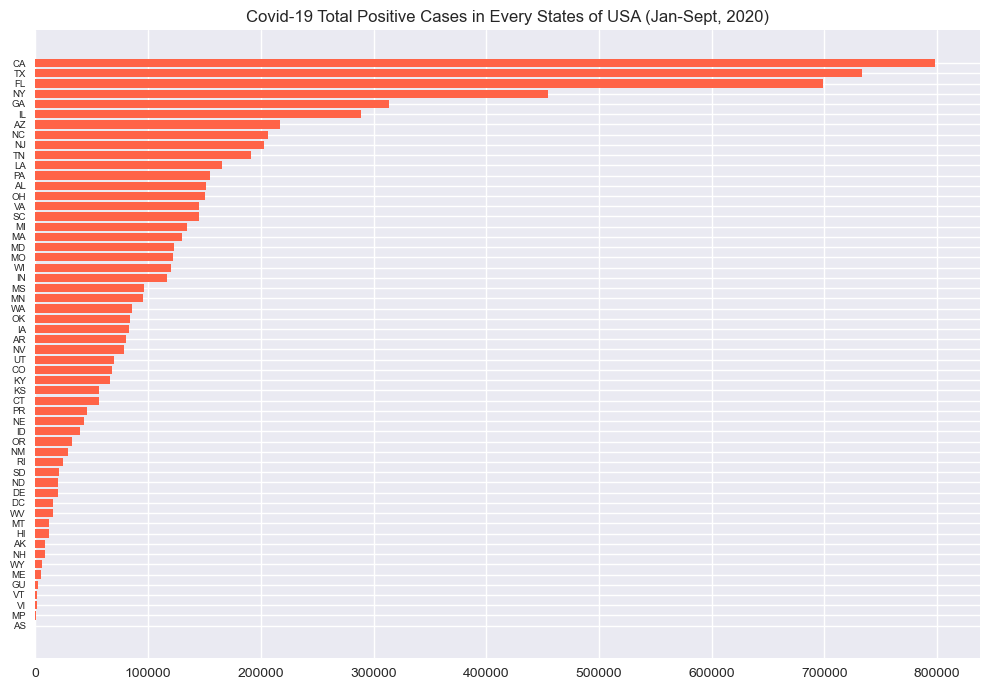

In [92]:
# visualizing Total Positive Cases in Every States
states = [ s for s in list(sorted_states) ]
total_cases = [ sorted_states[i] for i in list(sorted_states) ]

plt.figure(figsize=(10, 7), dpi=100)
plt.title('Covid-19 Total Positive Cases in Every States of USA (Jan-Sept, 2020)')
plt.yticks(fontsize=7)

plt.barh(states, total_cases, color='#FF6347');
plt.gca().invert_yaxis()
plt.tight_layout()

In [95]:
# visualizing Total Positive Cases in All States



# fig, ax = plt.subplots(10, 5, sharex=True)
# fig.suptitle('Daily Cases in US States', fontsize=25)

# fig.set_figheight(30)
# fig.set_figwidth(30)

# date_format = mpl_dates.DateFormatter('%b')


# i = 0
# j = 0

# for name, dfs in states_grp:
    
#     x = dfs.index
#     y = dfs['positiveIncrease']
    
#     if i < 10: 
#         ax[i,j].plot(x, abs(y), color='#008080');
#         ax[i,j].set_title(f'{name}', fontsize=17);
        
#         ax[i,j].xaxis.set_major_formatter(date_format);
#         j += 1
#         if j > 4:
#             i +=1
#             j = 0


# plt.show();